**Import required packages**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "C:\\Users\\HP\\OneDrive\\Saurav-Personal\\Documents\\NareshIT\\DataScience\\Datafiles\\Visadataset.csv"
visa_df = pd.read_csv(file_path)
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


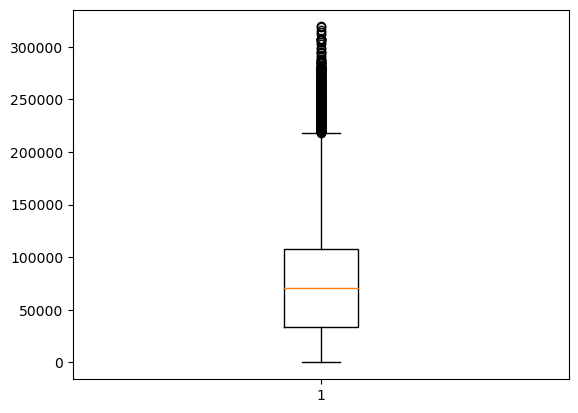

In [8]:
plt.boxplot(visa_df['prevailing_wage'])
plt.show()

# orange line: Median value = 5p data
# Black dots all are outliers

In [ ]:
Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

**Procedure to find the Outliers**

$Step-1$:
    - Calculate Q1, Q2 and Q3
    
$Step-2$:
    - Calculate IQR (Intel Quartile range) = (Q3 - Q1)

$Step-3$:
    - Calculate Upper bound (UB) = Q3 + (1.5 * IQR)
    - Calculate Lower bound (LB) = Q1 - (1.5 * IQR)

$Step-4$:
    - Find the outliers which are having greater than UB
    - Find the outliers which are having less than LB
    

In [17]:
p_wage= visa_df['prevailing_wage']
#Step-1
Q1 = np.quantile(p_wage,0.25)
Q2 = np.quantile(p_wage,0.50)
Q3 = np.quantile(p_wage,0.75)

#Step-2
IQR = Q3 - Q1

#Step-3
LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)


print("Q1 = ",Q1)
print("Q2 = ",Q2)
print("Q3 = ",Q3)
print("IQR = ",IQR)
print("LB = ",LB)
print("UB = ",UB)

#Step-4
# >UB <LB are the outliers
con1 = p_wage > UB
con2 = p_wage < LB

#Step-5
# if you apply | with outlier
outliers_df = visa_df[con1 | con2]
outliers_df

Q1 =  34015.479999999996
Q2 =  70308.20999999999
Q3 =  107735.51250000001
IQR =  73720.03250000002
LB =  -76564.56875000002
UB =  218315.56125000003


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [21]:
def outliers(col):
    df1= visa_df[col]
    Q1 = np.quantile(df1,0.25)
    Q2 = np.quantile(df1,0.50)
    Q3 = np.quantile(df1,0.75)
    IQR = Q3 - Q1
    LB = Q1 - (1.5 * IQR)
    UB = Q3 + (1.5 * IQR)
    con1 = df1 > UB
    con2 = df1 < LB
    outliers_df = visa_df[con1 | con2]
#     outliers_df
#     len(outliers_df)
    print(f'{col} has {len(outliers_df)} outliers')
    
num_col = visa_df.select_dtypes(exclude='object').columns
for col in  num_col:
    outliers(col)

no_of_employees has 1556 outliers
yr_of_estab has 3260 outliers
prevailing_wage has 427 outliers


In [37]:
p_wage= visa_df['prevailing_wage']
Q1 = np.quantile(p_wage,0.25)
Q2 = np.quantile(p_wage,0.50)
Q3 = np.quantile(p_wage,0.75)
IQR = Q3 - Q1
LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)

#### Outliers df #########
con1 = p_wage > UB
con2 = p_wage < LB
outliers_df = visa_df[con1 | con2]
# outliers_df

#### Non Outliers df #########
con11 = p_wage < UB
con22 = p_wage > LB

non_outliers_df = visa_df[con11 & con22]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


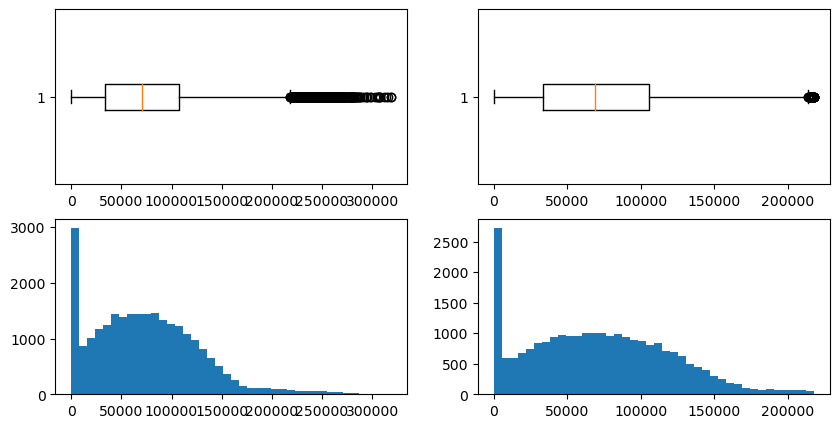

In [40]:
# Will Compare
# Total data vs Non outliers data
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.boxplot(visa_df['prevailing_wage'],
           vert = False) # 25480
plt.subplot(2,2,2)
plt.boxplot(non_outliers_df['prevailing_wage'],
           vert = False) # 25053
plt.subplot(2,2,3)
plt.hist(visa_df['prevailing_wage'],
           bins= 40)
plt.subplot(2,2,4)
plt.hist(non_outliers_df['prevailing_wage'],
           bins= 40) 
plt.show()

AttributeError: 'dict' object has no attribute 'subplot'

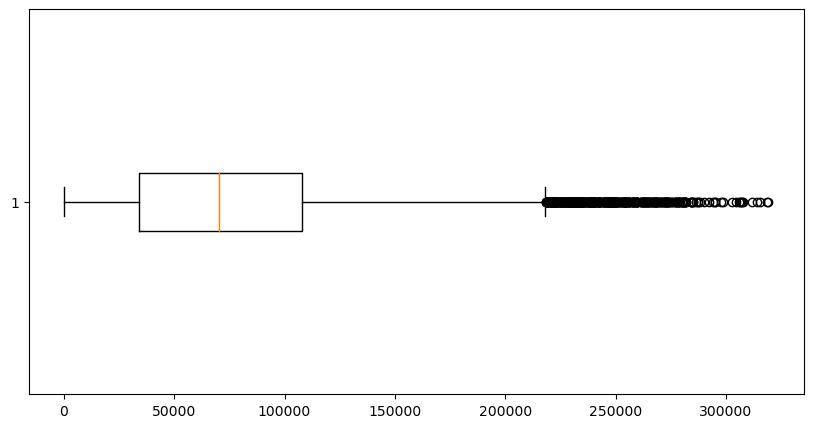

In [35]:
plt.figure(figsize=(10,5))
plt.boxplot(visa_df['prevailing_wage'],
           vert = False).subplot(1,2,1) # 25480
# plt.boxplot(non_outliers_df['prevailing_wage'],
#            vert = False).subplot(2,2,2) # 25053
plt.hist(visa_df['prevailing_wage'],
           bins = 40).subplot(1,2,2)
# plt.boxplot(non_outliers_df['prevailing_wage'],
#            bins = 40).subplot(2,2,4)
plt.show()

**How to deal outliers**
- Drop the outliers based some percentage

- if you have huge data

- and the outliers percentage is < 2, then drop the outliers
- Drop the outliers means, we are removing some rows all the columns
- In the above example total count = 25480, outliers are 427
    427 * 100/25480 = 1.6
- After removing 427 observations, we have 25053 observation (98% of data)
 
 - Impute (Fill) the outliers with Median value
    - We already know that outliers does not affect Median value
    - So if you donot loss the data, and you want fill the outliers then use Median
    
- Impute (Fill) with UB and LB values
   - Fill the outliers with UB value, which are having > UB
   - Fill the outliers with LB value, which are having < UB
    


In [ ]:
mean = 1l 2l 3l 4l # 1+2+3+4 / 4 = 2.5
median = 2.5

mean = 1l  2l 3l 4l 500Cr # 1+2+3+4+500 / 5 = 25Cr
median = 3l

In [ ]:
# Fill the outliers
# Missing values
# Bi variate multivariate
# Cate to num
# standard
# Transformation
# Featue selection
# PCA

In [ ]:
# To deal the outliers
# Drop outliers < 2
#

In [3]:
p_wage= visa_df['prevailing_wage']
Q1 = np.quantile(p_wage,0.25)
Q2 = np.quantile(p_wage,0.50)
Q3 = np.quantile(p_wage,0.75)
IQR = Q3 - Q1
LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)

#### Outliers df #########
con1 = p_wage > UB
con2 = p_wage < LB
outliers_df = visa_df[con1 | con2]
# outliers_df

#### Non Outliers df #########
con11 = p_wage < UB
con22 = p_wage > LB

non_outliers_df = visa_df[con11 & con22]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [4]:
len(non_outliers_df),len(outliers_df)

(25053, 427)

In [6]:
d1 =pd.DataFrame()
d1['Age'] = [1,2,3]
d1

,Age
0,1
1,2
2,3


In [7]:
# <median value> of original data frame (visa_df)
outliers_df['prevailing_wage'] =<median value>

SyntaxError: invalid syntax (1300474756.py, line 1)

In [9]:
median_value = visa_df['prevailing_wage'].median() 
median_value

70308.20999999999

In [12]:
median_value = visa_df['prevailing_wage'].median() 
outliers_df['prevailing_wage'] = median_value
# outliers_df['prevailing_wage']
modified_data = outliers_df
modified_data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_13664\1722360674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['prevailing_wage'] = median_value


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,70308.21,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,70308.21,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,70308.21,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,70308.21,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,70308.21,Year,Y,Certified


In [16]:
# now we have non_outliers_df and modified_data
# we need to merge, combine, concatenate
# outer join = A U B
# inner join = A Intersectio B
final_df = pd.merge(non_outliers_df,
                    modified_data,
                   how='outer')
final_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.2100,Year,Y,Denied
25476,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.2100,Year,N,Certified
25477,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.2100,Year,N,Certified
25478,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.2100,Year,N,Certified


In [15]:
#Concatenate
final_df = pd.concat([non_outliers_df,modified_data])

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,70308.2100,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,70308.2100,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,70308.2100,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,70308.2100,Year,N,Certified


In [17]:
#All ot gether

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:\\Users\\HP\\OneDrive\\Saurav-Personal\\Documents\\NareshIT\\DataScience\\Datafiles\\Visadataset.csv"
visa_df = pd.read_csv(file_path)
visa_df.head()

p_wage= visa_df['prevailing_wage']
Q1 = np.quantile(p_wage,0.25)
Q2 = np.quantile(p_wage,0.50)
Q3 = np.quantile(p_wage,0.75)
IQR = Q3 - Q1
LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)

#### Outliers df #########
con1 = p_wage > UB
con2 = p_wage < LB
outliers_df = visa_df[con1 | con2]
# outliers_df

#### Non Outliers df #########
con11 = p_wage < UB
con22 = p_wage > LB

non_outliers_df = visa_df[con11 & con22]
non_outliers_df

### Impute with Median value #######
median_value = visa_df['prevailing_wage'].median() 
outliers_df['prevailing_wage'] = median_value
# outliers_df['prevailing_wage']
modified_data = outliers_df
modified_data.head()
##### Merge two data frames
final_df = pd.concat([non_outliers_df,modified_data])

C:\Users\HP\AppData\Local\Temp\ipykernel_13664\329728009.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['prevailing_wage'] = median_value


{'whiskers': [<matplotlib.lines.Line2D at 0x1f4e06e3d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4e5f6fc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4e5f40ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4e5f80fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4e5f81790>],
 'means': []}

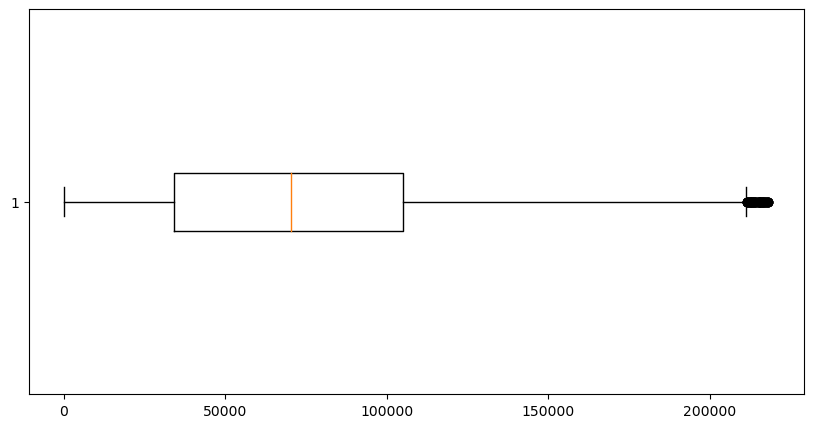

In [18]:
# Box Plot
plt.figure(figsize=(10,5))
plt.boxplot(final_df['prevailing_wage'],
           vert = False)

**np.wehere**

- np.where(<condition>,<True Value>, <False value>)

- np.where is used to fill the values based on True condition
- np.where will take 3 arguments
    - Condition
    - Value you want to replac, If that condition is true
    - Value you want to replace, if the condition is false
    
 **np.where(condition,true value, false value)**

In [20]:
d1 = pd.DataFrame()
d1['Name'] = ['Ramesh','Suresh','Sathish']
d1['Age'] = [24,30,32]
d1['Age'] > 25
con = d1['Age'] > 25
# where ever true : 300
# Where ever false: keep as it is
d1['Age'] = np.where(con,300,d1['Age'])
d1

,Name,Age
0,Ramesh,24
1,Suresh,300
2,Sathish,300


In [ ]:
# In the Age column > 25 I want replace 300
Name -----> age
0 ---> Ramesh ---> 24
1 ---> Suresh ---> 300
2 ---> Sathish ---> 300

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4e94cb590>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4e94cc6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4e94c9390>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4e94cecd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4e7f4ba50>],
 'means': []}

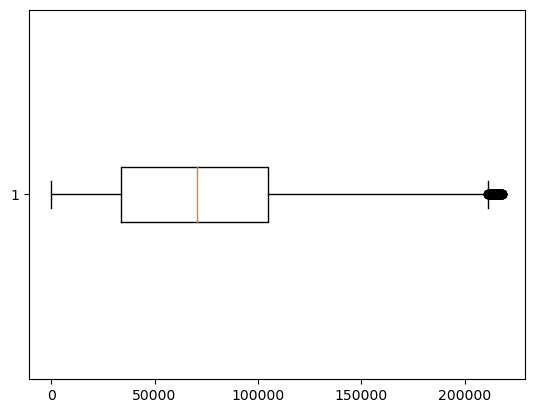

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "C:\\Users\\HP\\OneDrive\\Saurav-Personal\\Documents\\NareshIT\\DataScience\\Datafiles\\Visadataset.csv"
visa_df = pd.read_csv(file_path)
visa_df.head()

p_wage= visa_df['prevailing_wage']
Q1 = np.quantile(p_wage,0.25)
Q2 = np.quantile(p_wage,0.50)
Q3 = np.quantile(p_wage,0.75)
IQR = Q3 - Q1
LB = Q1 - (1.5 * IQR)
UB = Q3 + (1.5 * IQR)

#### Outliers df #########
con1 = p_wage > UB
con2 = p_wage < LB
# outliers_df = visa_df[con1 | con2]
median_value = p_wage.median()
con3 = con1 | con2
visa_df['prevailing_wage'] = np.where(con3, 
              median_value,
              visa_df['prevailing_wage'])
#list(d2)
# visa_df
visa_df['prevailing_wage']
plt.boxplot(visa_df['prevailing_wage'],
           vert=False)